In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from task_9.task_9 import EDA, read_excel_sheet, rename_columns
from task_20.task_20 import normalize_date_column, rename_columns_from_file, merge_dataframes_left_join, append_rehospitalized_status_to_patients

### **Adding the data**

(Assuming the data is fixed and without Hebrew Translation)

In [2]:
# Move two directories up
data_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "data"))

# Construct the full path to the file
file_absolute_path = os.path.join(data_dir, "rehospitalization.xlsx")
df = read_excel_sheet(file_absolute_path, "hospitalization1")

In [3]:
#mapping hebrew to english for visual improvements
translation = {
    "סוג קבלה": "Admission_type",
    "מהיכן המטופל הגיע": "Patient_departure",
    "רופא משחרר-קוד": "Releasing_Dr.(code)",
    "ימי אשפוז": "Hospitalization_duration(days)",
    "אבחנות בקבלה": "Admission_diagnoses",
    "אבחנות בשחרור": "Release_diagnoses"
}

df = rename_columns(df,translation)

### **EDA hospitalization1 (Task 9)**

In [4]:
hospitilazation1 = EDA(df)

In [5]:
hospitilazation1.stats()

First 5 indexes:
   Patient  unitName1  Admission_Medical_Record    Admission_Entry_Date  \
0    62051          1                   5207766 2021-09-04 22:21:04.440   
1   951769          2                   5605505 2022-02-15 14:39:02.220   
2   863707          2                   6755794 2023-05-15 04:21:09.137   
3   884200          3                   6964052 2023-07-27 08:16:48.640   
4   936226          4                   7023187 2023-08-20 19:44:35.410   

         Release_Date Admission_type Patient_departure Release_Type  \
0 2021-09-08 14:43:00           דחוף             מביתו  שוחרר לביתו   
1 2022-02-16 13:37:00           דחוף               אחר  שוחרר לביתו   
2 2023-05-15 15:59:00           דחוף             מביתו  שוחרר לביתו   
3 2023-07-28 17:34:00           דחוף             ממוסד  שוחרר לביתו   
4 2023-08-21 15:47:00           דחוף             מביתו  שוחרר לביתו   

   Releasing_Dr.(code)  Hospitalization_duration(days) Admission_diagnoses  \
0               6878.0     

[[<Axes: title={'center': 'Patient'}>
  <Axes: title={'center': 'unitName1'}>
  <Axes: title={'center': 'Admission_Medical_Record'}>]
 [<Axes: title={'center': 'Admission_Entry_Date'}>
  <Axes: title={'center': 'Release_Date'}>
  <Axes: title={'center': 'Releasing_Dr.(code)'}>]
 [<Axes: title={'center': 'Hospitalization_duration(days)'}> <Axes: >
  <Axes: >]]
31075     53
354573    23
65151     14
3523      13
34605     13
          ..
590181     1
790490     1
6181       1
801748     1
431801     1
Name: Patient, Length: 4515, dtype: int64
1    1582
4    1582
3    1392
2    1263
5    1214
Name: unitName1, dtype: int64
5207766    1
4638165    1
4684750    1
6659199    1
6194540    1
          ..
7240838    1
6422712    1
7232954    1
6810555    1
7229378    1
Name: Admission_Medical_Record, Length: 7033, dtype: int64
2021-09-04 22:21:04.440    1
2021-01-10 05:03:11.557    1
2021-01-29 21:15:59.523    1
2023-04-01 01:39:41.437    1
2022-09-24 02:36:33.567    1
                          

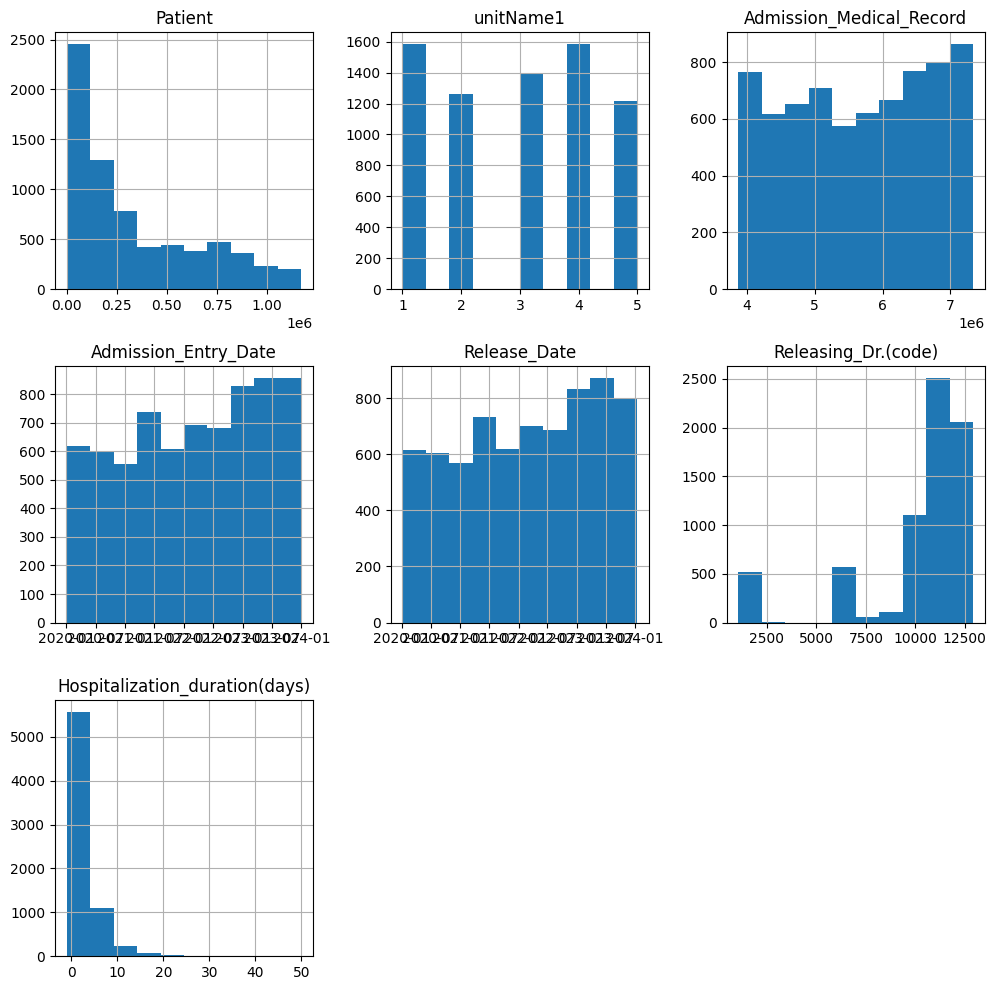

In [6]:
hospitilazation1.histogram()

/Users/soncity2/DataScience2/data-science2-lab-final-project/src/team_2/task_9/task_9.py:103: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(self.df.corr(), annot=True, cmap="coolwarm", fmt=".2f")


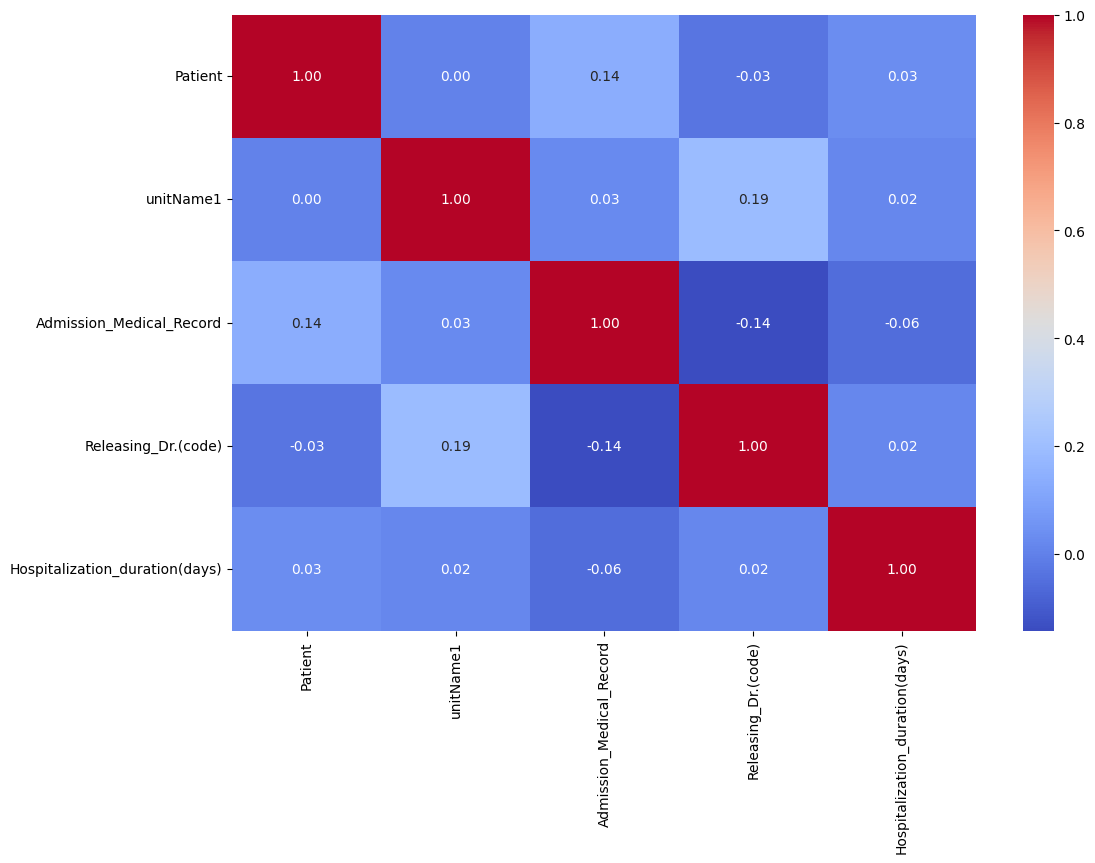

In [7]:
hospitilazation1.correlation()

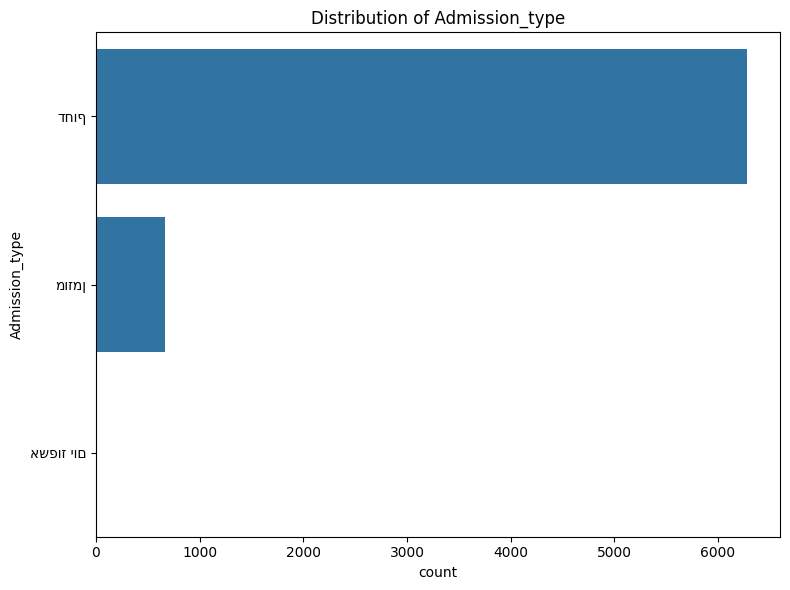

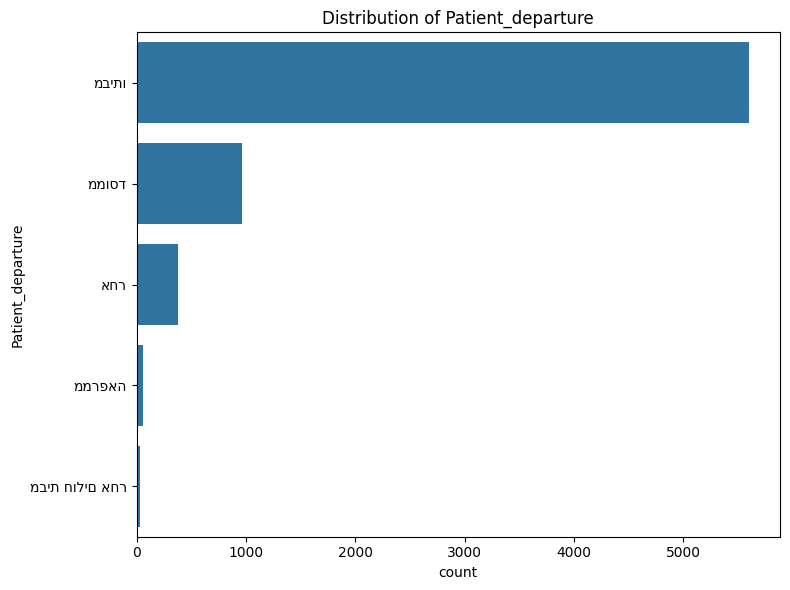

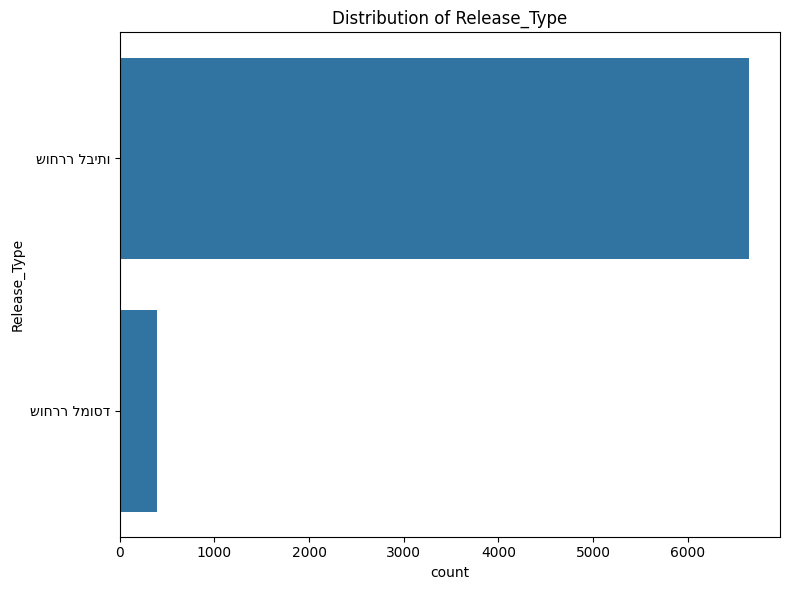

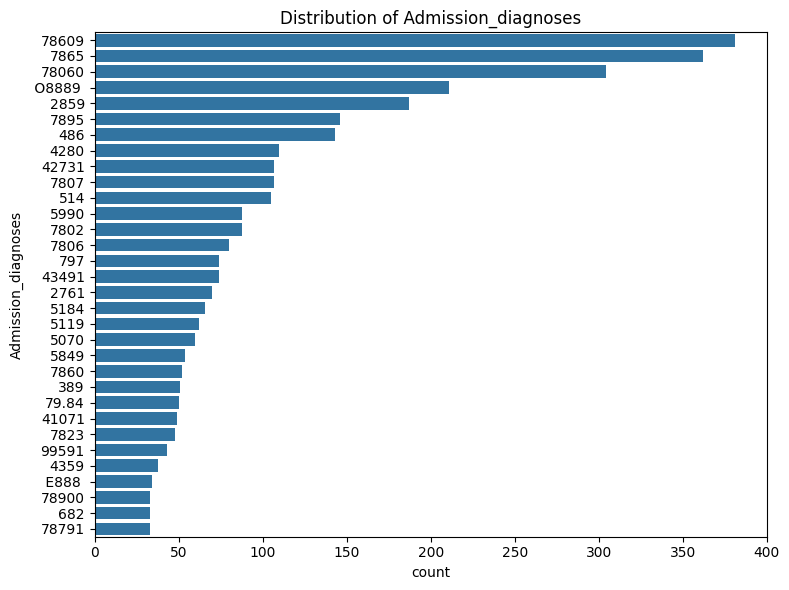

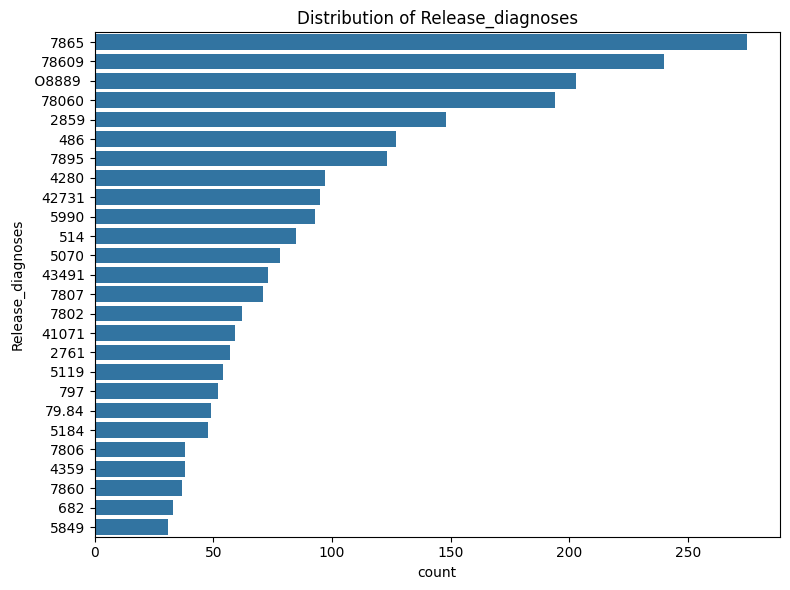

In [8]:
hospitilazation1.categorical_frequency(filter_columns=['Admission_diagnoses', 'Release_diagnoses'])

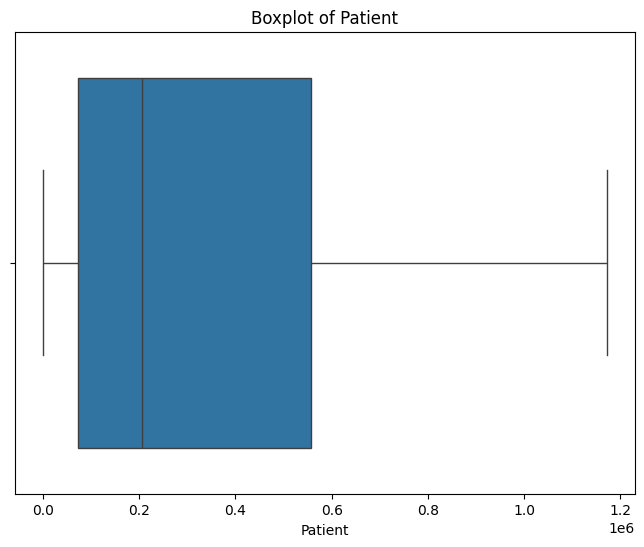

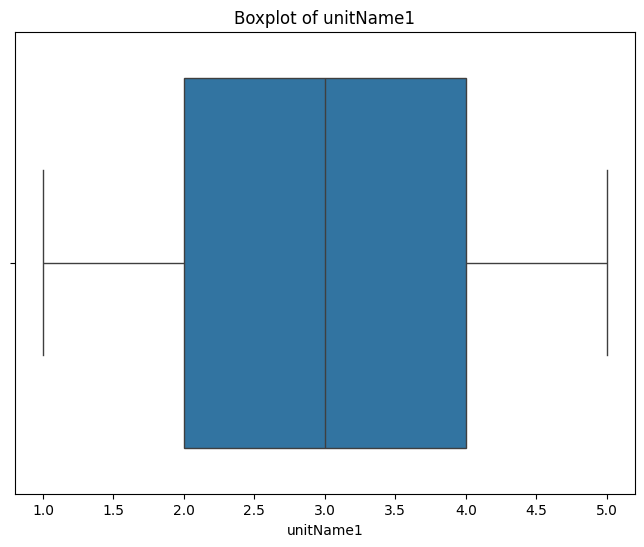

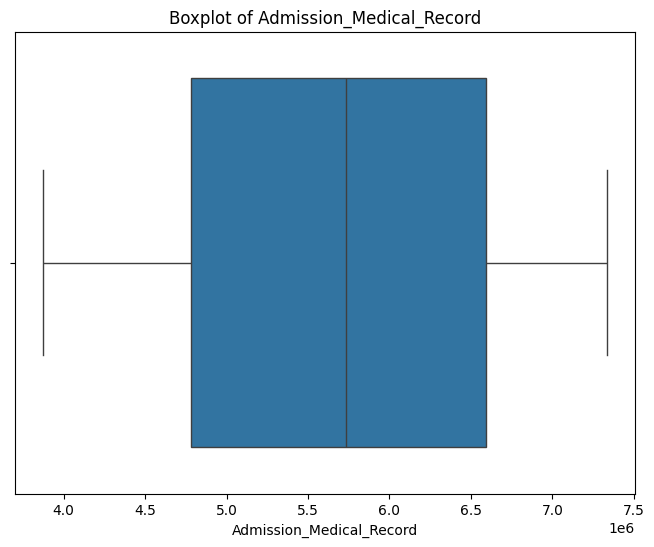

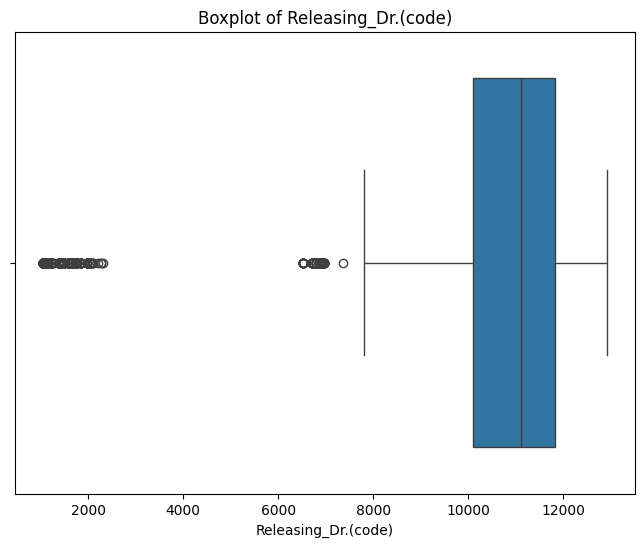

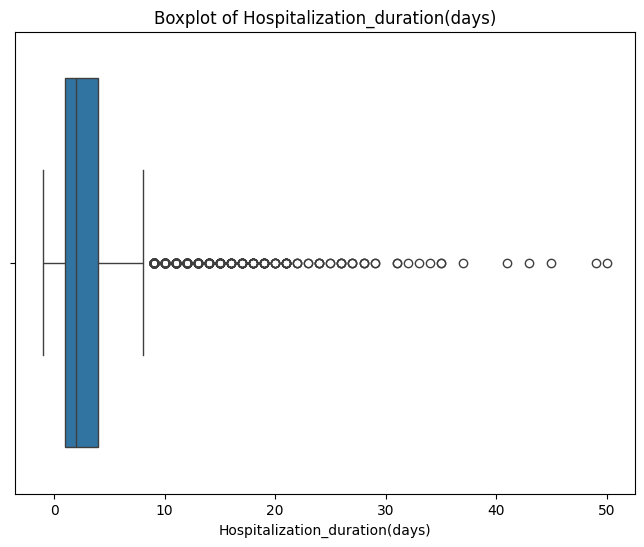

In [9]:
# Boxplots for numerical columns to identify outliers
hospitilazation1.outliers()

In [10]:
df[df.isnull().any(axis=1)]

,Patient,unitName1,Admission_Medical_Record,Admission_Entry_Date,Release_Date,Admission_type,Patient_departure,Release_Type,Releasing_Dr.(code),Hospitalization_duration(days),Admission_diagnoses,Release_diagnoses
22,209824,1,6221515,2022-10-08 09:29:34.083,2022-10-12 12:00:00,דחוף,מביתו,שוחרר לביתו,1147.0,4,NaN,79.84
44,348264,1,5343007,2021-11-03 07:52:41.453,2021-11-03 14:09:00,מוזמן,מביתו,שוחרר לביתו,11178.0,0,NaN,Other
55,58949,2,6984278,2023-08-03 21:44:06.410,2023-08-07 12:40:00,דחוף,אחר,שוחרר לביתו,11233.0,4,NaN,Other
79,586621,2,4347093,2020-08-24 11:05:42.410,2020-08-26 14:21:00,NaN,מביתו,שוחרר לביתו,10615.0,2,Other,Other
130,2435,1,4284638,2020-07-25 23:58:34.350,2020-07-31 00:12:00,דחוף,מביתו,שוחרר לביתו,NaN,6,Other,7895
...,...,...,...,...,...,...,...,...,...,...,...,...
6975,93771,2,6998293,2023-08-09 12:26:10.593,2023-08-10 13:45:00,דחוף,מביתו,שוחרר לביתו,11515.0,1,NaN,Other
6976,52684,5,6137087,2022-09-01 02:54:53.480,2022-09-08 13:03:00,דחוף,מביתו,שוחרר לביתו,NaN,7,486,Other
7016,926285,1,6106167,2022-08-15 21:49:11.407,2022-08-18 13:54:00,דחוף,מביתו,שוחרר לביתו,11206.0,3,NaN,Other
7022,303235,1,7319414,2023-12-26 09:25:25.690,2023-12-26 22:09:00,מוזמן,מביתו,שוחרר לביתו,1143.0,0,NaN,O8889


In [11]:
for col in df.columns:
    print(f"Unique values in '{col}':")
    print(df[col].value_counts())
    print("\n" + "="*40 + "\n")

Unique values in 'Patient':
31075     53
354573    23
65151     14
3523      13
34605     13
          ..
590181     1
790490     1
6181       1
801748     1
431801     1
Name: Patient, Length: 4515, dtype: int64


Unique values in 'unitName1':
1    1582
4    1582
3    1392
2    1263
5    1214
Name: unitName1, dtype: int64


Unique values in 'Admission_Medical_Record':
5207766    1
4638165    1
4684750    1
6659199    1
6194540    1
          ..
7240838    1
6422712    1
7232954    1
6810555    1
7229378    1
Name: Admission_Medical_Record, Length: 7033, dtype: int64


Unique values in 'Admission_Entry_Date':
2021-09-04 22:21:04.440    1
2021-01-10 05:03:11.557    1
2021-01-29 21:15:59.523    1
2023-04-01 01:39:41.437    1
2022-09-24 02:36:33.567    1
                          ..
2023-11-26 15:30:32.170    1
2022-12-29 22:00:43.417    1
2023-11-22 18:41:23.047    1
2023-06-05 14:00:02.710    1
2023-11-21 16:22:11.033    1
Name: Admission_Entry_Date, Length: 7033, dtype: int64


Unique 

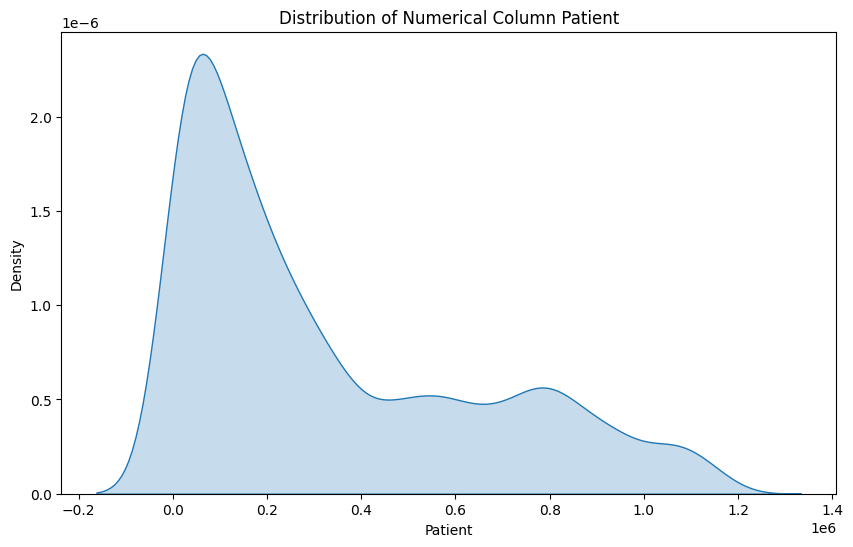

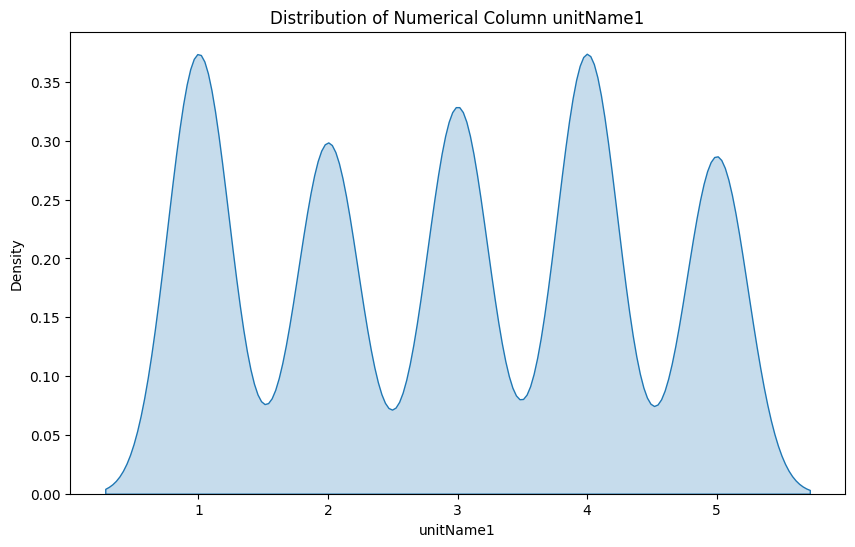

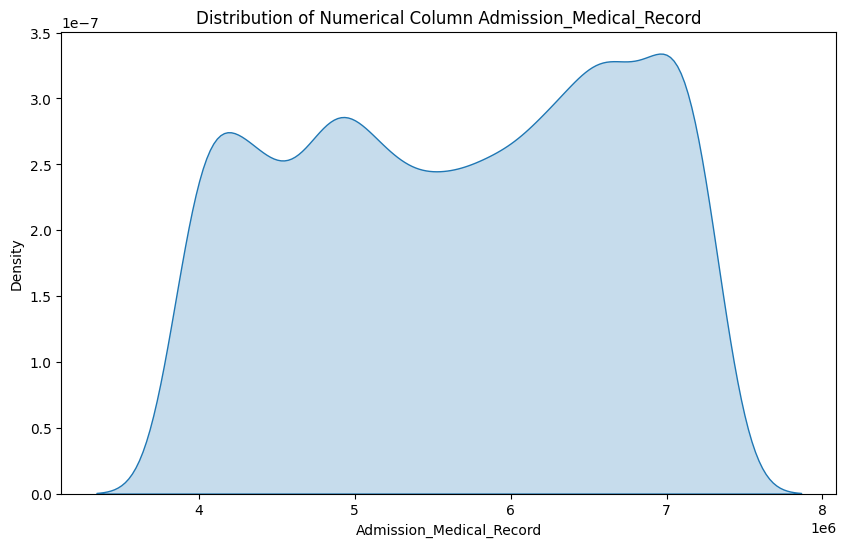

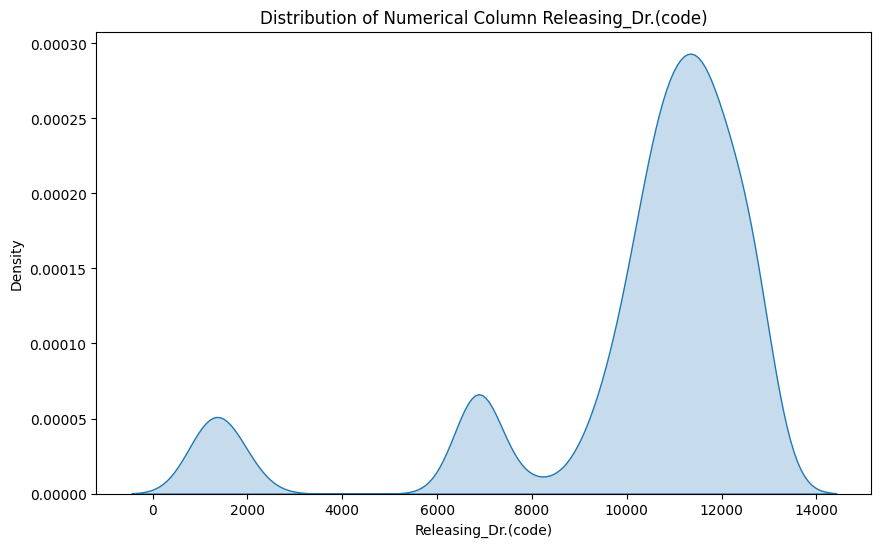

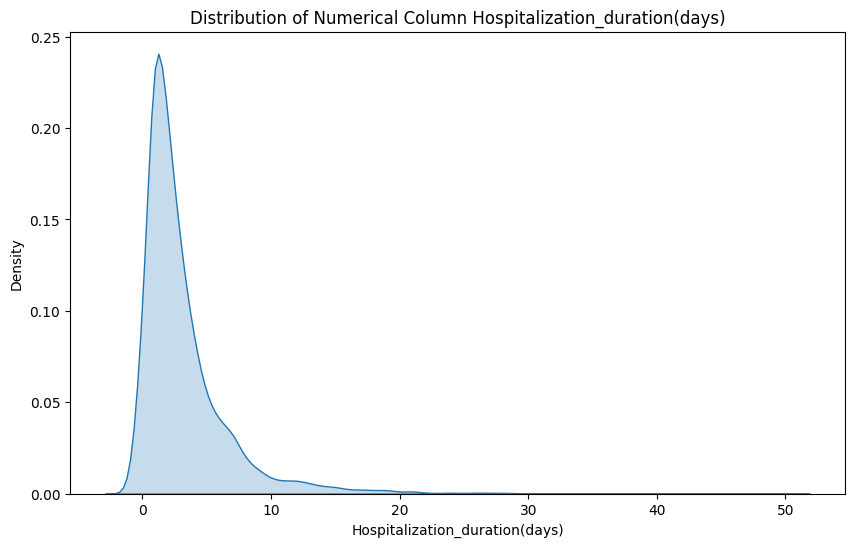

In [12]:
hospitilazation1.kde_numerical()

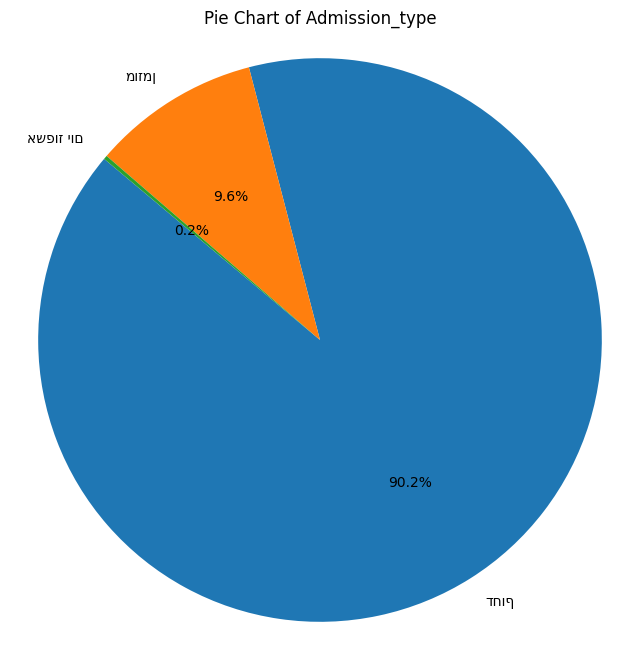

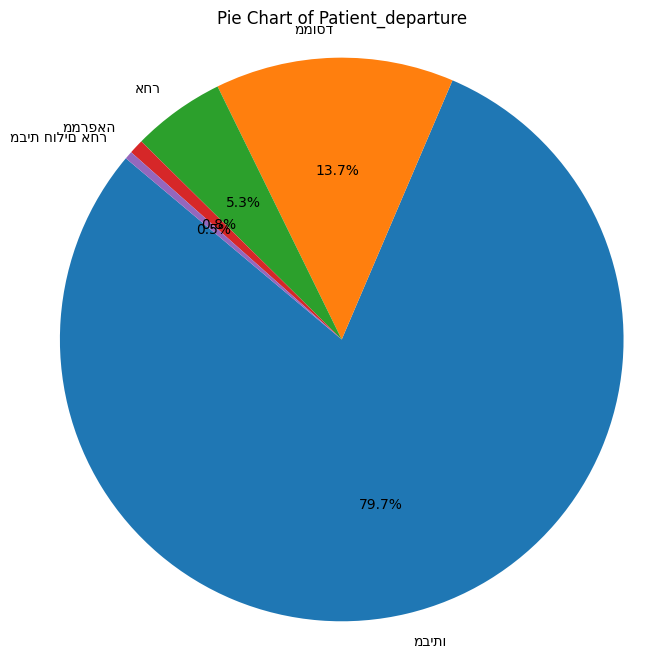

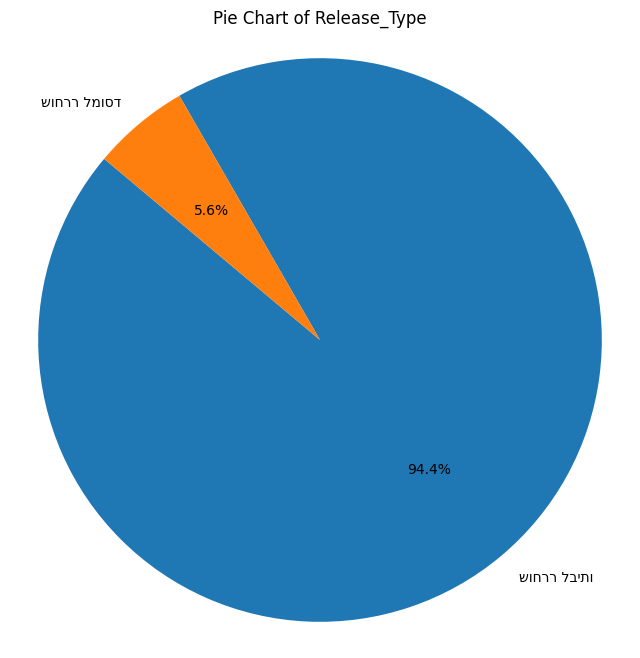

In [13]:
hospitilazation1.pie_charts_for_categorical()

### **Task 20**

In [14]:
# Construct the full path to the file
file_absolute_path = os.path.join(data_dir, "rehospitalization.xlsx")
rDoctor_df = read_excel_sheet(file_absolute_path, "רופאים משחררים מהאשפוז")
hDoctor_df = read_excel_sheet(file_absolute_path, "hDoctor")

In [15]:
rDoctor_df = rename_columns_from_file(rDoctor_df, os.path.join(os.getcwd(), "task_20", "release_Doctors_columns.json"))
hDoctor_df = rename_columns_from_file(rDoctor_df, os.path.join(os.getcwd(), "task_20", "hDoctor_columns.json"))

In [24]:
hDoctor_df.head()

,Releasing_Dr.(code),Senior
0,1052,N
1,1059,N
2,1072,N
3,1103,?
4,1107,N


In [16]:
releaseDoctors = EDA(rDoctor_df)

In [17]:
releaseDoctors.stats()

First 5 indexes:
   Releasing_Dr.(code) Senior
0                 1052      N
1                 1059      N
2                 1072      N
3                 1103      ?
4                 1107      N
Last 5 indexes:
     Releasing_Dr.(code) Senior
209                12858      ?
210                12865      N
211                12886      N
212                12914      ?
213                12916      N
Column types:
Releasing_Dr.(code)     int64
Senior                 object
dtype: object
Dataframe summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Releasing_Dr.(code)  214 non-null    int64 
 1   Senior               214 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.5+ KB
None
       Releasing_Dr.(code)
count           214.000000
mean           9427.247664
std            3604.038767
min            1052.00000

[[<Axes: title={'center': 'Releasing_Dr.(code)'}>]]
1052     1
11459    1
11482    1
11484    1
11504    1
        ..
9972     1
9975     1
9983     1
10014    1
12916    1
Name: Releasing_Dr.(code), Length: 214, dtype: int64
N                                     80
תלוי עד איזה תאריך מתייחסים ל-DATA    52
?                                     49
Y                                     33
Name: Senior, dtype: int64


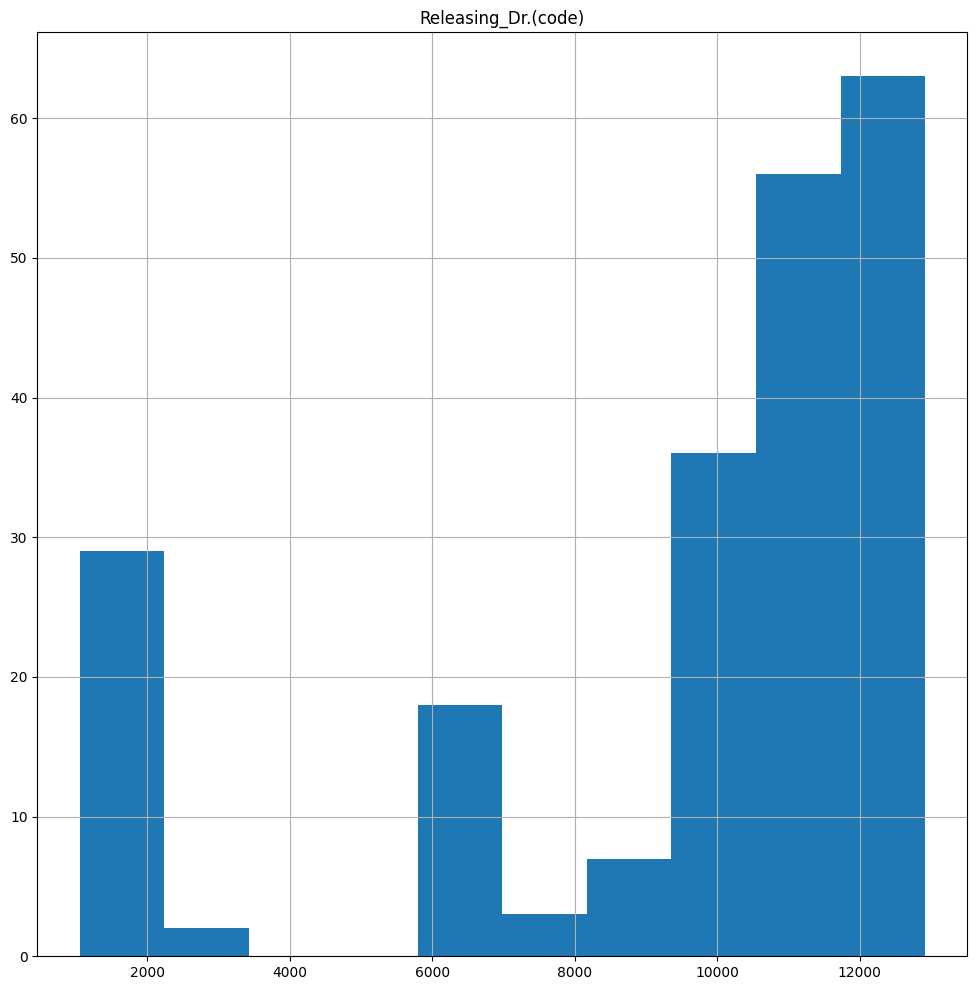

In [18]:
releaseDoctors.histogram()

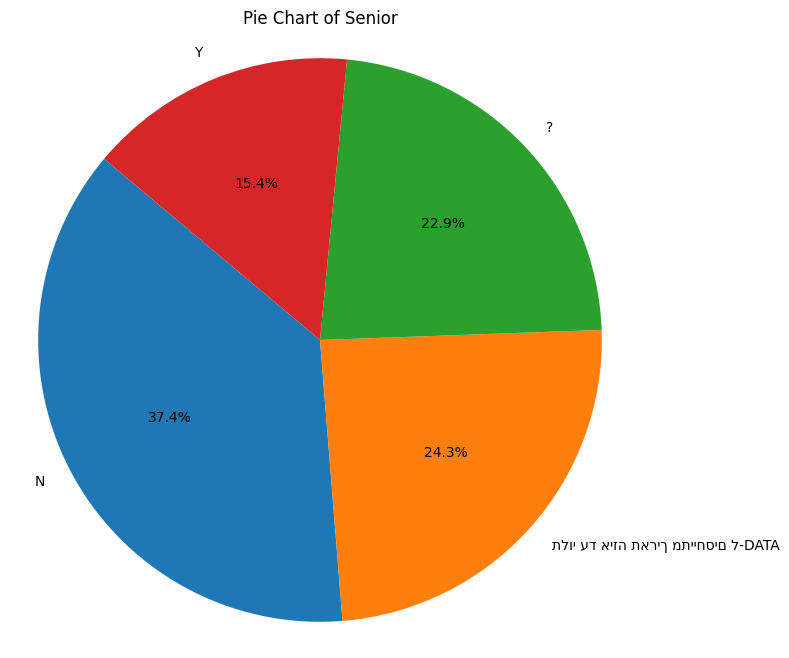

In [19]:
releaseDoctors.pie_charts_for_categorical()

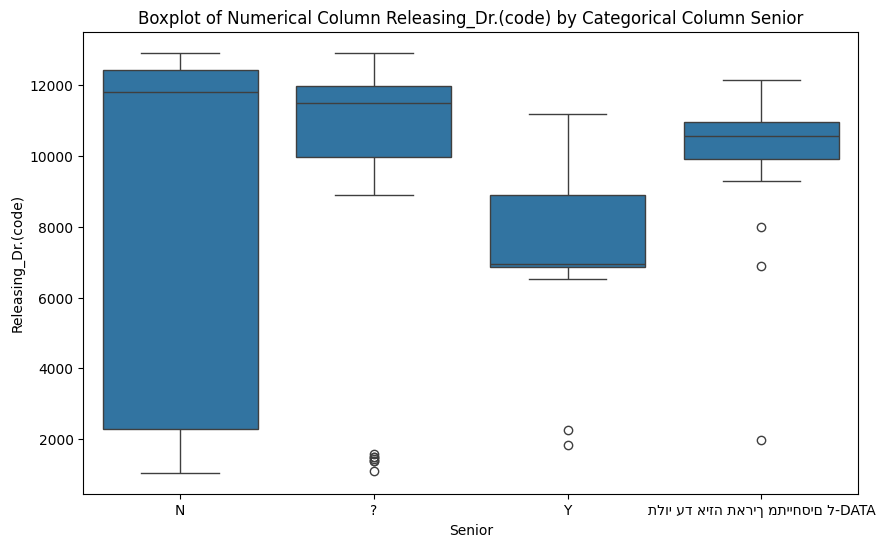

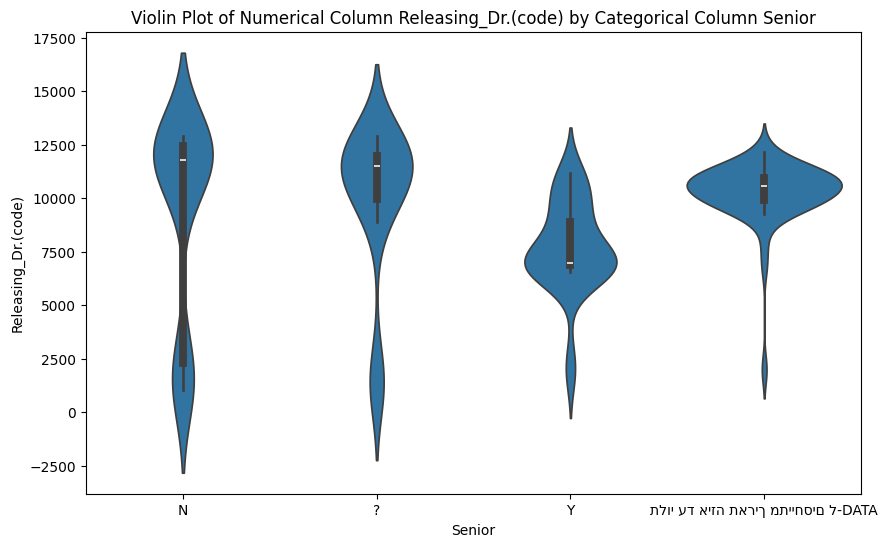

In [20]:
releaseDoctors.numeric_vs_categorical("Releasing_Dr.(code)","Senior")

In [21]:
df = append_rehospitalized_status_to_patients(df, column_name="Patient")
df.head()

,Patient,unitName1,Admission_Medical_Record,Admission_Entry_Date,Release_Date,Admission_type,Patient_departure,Release_Type,Releasing_Dr.(code),Hospitalization_duration(days),Admission_diagnoses,Release_diagnoses,rehospitalization_count,is_rehospitalization
0,62051,1,5207766,2021-09-04 22:21:04.440,2021-09-08 14:43:00,דחוף,מביתו,שוחרר לביתו,6878.0,4,42731,42731,3,True
1,951769,2,5605505,2022-02-15 14:39:02.220,2022-02-16 13:37:00,דחוף,אחר,שוחרר לביתו,12615.0,1,Other,Other,1,False
2,863707,2,6755794,2023-05-15 04:21:09.137,2023-05-15 15:59:00,דחוף,מביתו,שוחרר לביתו,12599.0,0,7895,7895,12,True
3,884200,3,6964052,2023-07-27 08:16:48.640,2023-07-28 17:34:00,דחוף,ממוסד,שוחרר לביתו,11582.0,1,78609,Other,1,False
4,936226,4,7023187,2023-08-20 19:44:35.410,2023-08-21 15:47:00,דחוף,מביתו,שוחרר לביתו,12359.0,1,78609,Other,1,False


In [22]:
# Filter the DataFrame to include only patients with at least 2 records
df_filtered = df[df['is_rehospitalization']]
df_filtered.head()

,Patient,unitName1,Admission_Medical_Record,Admission_Entry_Date,Release_Date,Admission_type,Patient_departure,Release_Type,Releasing_Dr.(code),Hospitalization_duration(days),Admission_diagnoses,Release_diagnoses,rehospitalization_count,is_rehospitalization
0,62051,1,5207766,2021-09-04 22:21:04.440,2021-09-08 14:43:00,דחוף,מביתו,שוחרר לביתו,6878.0,4,42731,42731,3,True
2,863707,2,6755794,2023-05-15 04:21:09.137,2023-05-15 15:59:00,דחוף,מביתו,שוחרר לביתו,12599.0,0,7895,7895,12,True
5,429566,3,6219263,2022-10-06 14:33:02.843,2022-10-08 12:58:00,דחוף,מביתו,שוחרר לביתו,11582.0,2,Other,Other,2,True
8,4767,5,6587317,2023-03-03 21:57:32.220,2023-03-05 16:21:00,דחוף,מביתו,שוחרר לביתו,11810.0,2,79.84,79.84,2,True
11,13171,5,6481821,2023-01-22 13:38:57.960,2023-01-24 17:12:00,דחוף,מביתו,שוחרר לביתו,9281.0,2,7802,Other,8,True


In [23]:
# Assuming 'doctor_id' is the common key
left_table_columns = ['Releasing_Dr.(code)', 'Admission_Entry_Date']
right_table_columns = ['Releasing_Dr.(code)', 'date']
df_combined1 = merge_dataframes_left_join(df_filtered, hDoctor_df, left_table_columns=left_table_columns, right_table_columns=right_table_columns)

AssertionError: Column 'date' not found in the right dataframe.